In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
%matplotlib inline

In [4]:
!ls data

x_test.csv  x_train.csv y_train.csv


In [17]:
df_xtrain = pd.read_csv('data/x_train.csv', sep = ';')
df_ytrain = pd.read_csv('data/y_train.csv', sep = ';', header = None)
df_xtest = pd.read_csv('data/x_test.csv', sep = ';')

In [18]:
print(df_xtrain.shape)
print(df_xtest.shape)
print(df_ytrain.shape)

(25289, 12)
(25289, 12)
(25289, 1)


In [19]:
df_xtrain.head()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
0,39,10,3,17,24.444444,1,5,0.400000,2650000,1375,21,2
1,21,22,19,55,17.045455,1,6,0.333333,5614000,3825,51,4
2,5,6,1,6,8.400000,0,1,1.000000,857000,1150,14,1
3,21,2,5,6,19.000000,0,1,0.000000,120000,0,1,1
4,4,5,1,5,9.600000,0,1,1.000000,857000,1075,12,1


In [20]:
df_xtrain.tail()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
25284,3,4,1,4,7.000000,0,0,0.0,800000,1000,9,1
25285,8,9,1,9,14.000000,0,3,1.0,1833000,1775,19,1
25286,6,7,2,9,10.571429,0,2,0.5,1483000,1375,16,1
25287,55,1,1,1,17.000000,1,1,1.0,101000,0,1,1
25288,1,2,1,2,6.000000,0,0,0.0,376000,500,3,1


In [22]:
df_xtrain.columns

Index(['maxPlayerLevel', 'numberOfAttemptedLevels',
       'attemptsOnTheHighestLevel', 'totalNumOfAttempts',
       'averageNumOfTurnsPerCompletedLevel', 'doReturnOnLowerLevels',
       'numberOfBoostersUsed', 'fractionOfUsefullBoosters', 'totalScore',
       'totalBonusScore', 'totalStarsCount', 'numberOfDaysActuallyPlayed'],
      dtype='object')

In [23]:
corr = df_xtrain.corr()

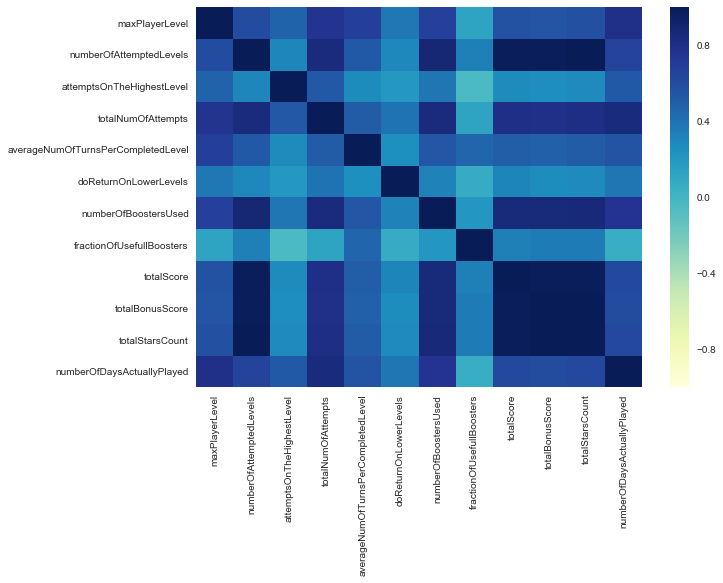

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

In [25]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [26]:
df_xtrain[df_xtrain.columns].head()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed
0,39,10,3,17,24.444444,1,5,0.400000,2650000,1375,21,2
1,21,22,19,55,17.045455,1,6,0.333333,5614000,3825,51,4
2,5,6,1,6,8.400000,0,1,1.000000,857000,1150,14,1
3,21,2,5,6,19.000000,0,1,0.000000,120000,0,1,1
4,4,5,1,5,9.600000,0,1,1.000000,857000,1075,12,1


In [27]:
df_xtrain['difference'] = df_xtrain['maxPlayerLevel'] - df_xtrain['numberOfAttemptedLevels']
df_xtest['difference'] = df_xtest['maxPlayerLevel'] - df_xtest['numberOfAttemptedLevels']

df_xtrain['maxattempted'] =  df_xtrain['totalStarsCount']/(1+df_xtrain['totalBonusScore'])
df_xtest['maxattempted'] =  df_xtest['totalStarsCount']/(1+df_xtest['totalBonusScore'])

df_xtrain['total_vs_bonus'] =  df_xtrain['totalScore']/df_xtrain['totalBonusScore']
df_xtest['total_vs_bonus'] =  df_xtest['totalScore']/df_xtest['totalBonusScore']

df_xtrain['levels_vs_days'] =  df_xtrain['numberOfAttemptedLevels']/df_xtrain['numberOfDaysActuallyPlayed']
df_xtest['levels_vs_days'] =  df_xtest['numberOfAttemptedLevels']/df_xtest['numberOfDaysActuallyPlayed']

In [28]:
gbm = xgb.XGBClassifier(
    base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=700, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)\
.fit(df_xtrain, df_ytrain)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


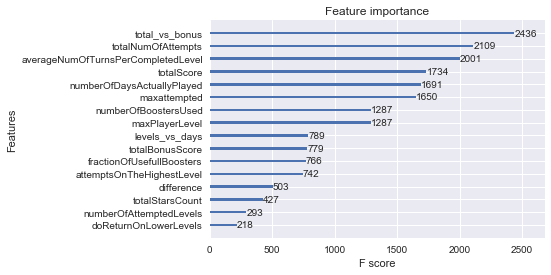

In [29]:
xgb.plot_importance(gbm)

In [30]:
xgb_matrix = xgb.DMatrix(df_xtrain, df_ytrain)
xgb_param = gbm.get_xgb_params()
cvresult = xgb.cv(
    xgb_param,
    xgb_matrix,
    num_boost_round=xgb_param['n_estimators'],
    nfold=5,
    verbose_eval=20,
    early_stopping_rounds=50,
    metrics='logloss'
)

[0]	train-logloss:0.688001+1.73597e-05	test-logloss:0.688052+2.93435e-05
[20]	train-logloss:0.603003+0.000307767	test-logloss:0.604239+0.000578271
[40]	train-logloss:0.54321+0.000489621	test-logloss:0.545622+0.00107921
[60]	train-logloss:0.499915+0.000637702	test-logloss:0.503437+0.00147127
[80]	train-logloss:0.467957+0.000753147	test-logloss:0.472526+0.00179937
[100]	train-logloss:0.443996+0.000834748	test-logloss:0.449683+0.00211082
[120]	train-logloss:0.42583+0.000894587	test-logloss:0.43261+0.00239261
[140]	train-logloss:0.411918+0.000944063	test-logloss:0.419745+0.00267412
[160]	train-logloss:0.401219+0.000972386	test-logloss:0.410064+0.00297335
[180]	train-logloss:0.392925+0.00100246	test-logloss:0.402786+0.00324609
[200]	train-logloss:0.386456+0.00103927	test-logloss:0.397371+0.0034727
[220]	train-logloss:0.381411+0.0010846	test-logloss:0.393335+0.00369469
[240]	train-logloss:0.377346+0.0010836	test-logloss:0.390272+0.00390736
[260]	train-logloss:0.374093+0.00110275	test-logloss

In [31]:
predictions = gbm.predict_proba(df_xtest)
predictions_filtered = [x[1] for x in predictions]

In [32]:
predictions

array([[ 0.89664215,  0.10335786],
       [ 0.97767925,  0.02232073],
       [ 0.39793974,  0.60206026],
       ..., 
       [ 0.94758582,  0.0524142 ],
       [ 0.76607919,  0.23392078],
       [ 0.95841163,  0.04158837]], dtype=float32)

In [33]:
np.savetxt("submission.csv", predictions_filtered, delimiter="\n")